# Projet ML01
Réalisé par Céline Ozkaya, Brieu Legoff, Valentin Filliol et Jules Mondesert



# Présentation du projet

Ce projet vise à étudier la réussite d'étudiants en s'appuyant sur divers critères socio-démographiques et comportementaux. Les données utilisées proviennent d'une enquête portant sur les performances des élèves du secondaire en mathématiques et en portugais, disponible sur le site Kaggle.

Chercher à prédire les résultats et la réussite d’un étudiant à partir de son profil (cadre familial, contexte social, etc.) n'étant pas éthique, nous avons plutôt cherché à mettre en lumière les facteurs influents afin de comprendre l’origine de ces résultats. En ce sens, il s’agira de comprendre en quoi le profil d’un étudiant influence sa réussite scolaire.


# Données

La liste ci-dessous présente l'ensemble des critères de la base de données. Nous avons choisi de n’utiliser qu’une partie des données de l’étude, elles sont représentées par les variables en bleu.

1. school - École de l'élève (binaire : 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
2. <font color='seablue'> sex - Sexe de l'élève (binaire : 'F' - féminin ou 'M' - masculin) </font>
3. age - Âge de l'élève (numérique : de 15 à 22 ans)
4. address - Type d'adresse du domicile de l'élève (binaire : 'U' - urbain ou 'R' - rural)
5. famsize - Taille de la famille (binaire : 'LE3' - inférieure ou égale à 3 ou 'GT3' - supérieure à 3)
6. pstatus - Statut de cohabitation des parents (binaire : 'T' - vivant ensemble ou 'A' - séparés)
7. <font color='seablue'> medu - Éducation de la mère (numérique : 0 - aucune, 1 - éducation primaire (4e année), 2 - de la 5e à la 9e année, 3 - éducation secondaire ou 4 - éducation supérieure) </font>
8. <font color='seablue'> fedu - Éducation du père (numérique : 0 - aucune, 1 - éducation primaire (4e année), 2 - de la 5e à la 9e année, 3 - éducation secondaire ou 4 - éducation supérieure) </font>
9. mjob - Profession de la mère (nominal : 'teacher', 'health' care related, civil 'services' (par exemple, administrative ou police), 'at_home' ou 'other')
10. fjob - Profession du père (nominal : 'teacher', 'health' care related, civil 'services' (par exemple, administrative ou police), 'at_home' ou 'other')
11. reason - Raison de choisir cette école (nominal : près de 'home', 'school reputation', préférence de 'course' ou 'other')
12. guardian - Tuteur de l'élève (nominal : 'mother', 'father' ou 'other')
13. <font color='seablue'> traveltime - Temps de trajet entre la maison et l'école (numérique : 1 - <15 min., 2 - 15 à 30 min., 3 - 30 min. à 1 heure, ou 4 - >1 heure) </font>
14. <font color='seablue'> studytime - Temps d'étude hebdomadaire (numérique : 1 - <2 heures, 2 - 2 à 5 heures, 3 - 5 à 10 heures, ou 4 - >10 heures) </font>
15. <font color='seablue'> failures - Nombre d'échecs scolaires antérieurs (numérique : n si 1 <= n < 3, sinon 4) </font>
16. schoolsup - Soutien éducatif supplémentaire (binaire : oui ou non)
17. famsup - Soutien éducatif familial (binaire : oui ou non)
18. paid - Cours payants supplémentaires dans la matière du cours (Math ou Portugais) (binaire : oui ou non)
19. activities - Activités parascolaires (binaire : oui ou non)
20. nursery - Fréquentation de l'école maternelle (binaire : oui ou non)
21. <font color='seablue'> higher - Souhaite poursuivre des études supérieures (binaire : oui ou non) </font>
22. internet - Accès à Internet à domicile (binaire : oui ou non)
23. <font color='seablue'> romantic - En relation romantique (binaire : oui ou non) </font>
24. famrel - Qualité des relations familiales (numérique : de 1 - très mauvaise à 5 - excellente)
25. freetime - Temps libre après l'école (numérique : de 1 - très faible à 5 - très élevé)
26. <font color='seablue'> goout - Sortir avec des amis (numérique : de 1 - très faible à 5 - très élevé) </font>
27. dalc - Consommation d'alcool en semaine (numérique : de 1 - très faible à 5 - très élevée)
28. walc - Consommation d'alcool le week-end (numérique : de 1 - très faible à 5 - très élevée)
29. <font color='seablue'> health - État de santé actuel (numérique : de 1 - très mauvais à 5 - très bon) </font>
30. <font color='seablue'>absence - nombre d'absence à l'école (de 0 à 93) </font>
31. <font color='darkseagreen'>G1 - Note du premier trimestre (numérique : de 0 à 20) </font>
32. <font color='darkseagreen'>G2 - Note du deuxième trimestre (numérique : de 0 à 20) </font>
33. <font color='darkseagreen'>G3 - Note finale (numérique : de 0 à 20, cible de sortie) </font>

Les variables catégorielles ont été binarisées. Par exemple, la variable "sex" qui vaut "F" ou "M" a été convertie en "0" ou "1".

La base de données n'indiquant pas si les étudiants ont obtenu ou non leur année, nous avons décidé d’attribuer ce résultat en effectuant la moyenne des notes trimestrielles (G1, G2, G3). Ainsi, si cette moyenne est supérieure à 10, nous considérons que l’année est validée. Notre étude repose donc sur deux classes :
*   1 pour les élèves dont la moyenne est supérieure 10 (Année validée)
*   0 pour les élèves dont la moyenne est inférieure 10 (Année échouée)



# Imports

In [51]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [2]:
chemin = "data/port.csv"

# Lecture des données

## Extraction de X et Y

In [3]:
def extractionX(chemin):
    df = pd.read_csv(chemin, sep=",")
    print(df.columns)
    colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences']
    XTrain = df[colonnes]
    print("XTrain :\n", XTrain)
    XTrain = XTrain.to_numpy()
    return XTrain

In [4]:
def extractionY(chemin):

    df = pd.read_csv(chemin, sep=",")
    print(df.columns)
    colonnes = ['G1', 'G2', 'G3']
    dataYTrain = df[colonnes] 

    dataYTrain = np.array(dataYTrain, dtype=int)
    print("dataYTrain : ", dataYTrain)
    YTrain = np.mean(dataYTrain, axis=1) # moyenne des 3 trimestres
    print("YTrain", YTrain)
    
    # attribuer 1 si au dessus de 10 et 0 sinon
    for i in range(len(YTrain)):
        if YTrain[i] > 10 :
            YTrain[i] = 1
        else:
            YTrain[i] = 0
    YTrain = YTrain.astype(int)
    dimensionsYTrain = YTrain.shape

    return YTrain

## Séparation de la base d'apprentissage et de la base test

In [5]:
chemin = "data/port.csv"
XTrain, XTest, YTrain, YTest = train_test_split(extractionX(chemin), extractionY(chemin), test_size=0.2, random_state=42)

Index(['school', 'sex', 'age', 'address', 'Famsize', 'Pstatus', 'Fedu', 'Medu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'Famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'Famrel', 'Freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gmoy por'],
      dtype='object')
XTrain :
      sex  Pstatus  Medu  Fedu  traveltime  studytime  failures  higher  \
0      1        0     4     4           2          2         0       1   
1      1        1     1     1           1          2         0       1   
2      1        1     1     1           1          2         0       1   
3      1        1     2     4           1          3         0       1   
4      1        1     3     3           1          2         0       1   
..   ...      ...   ...   ...         ...        ...       ...     ...   
644    1        1     3     2           1          3         1       1   
6

# Introduction aux données

## Proportion par classe 

In [6]:
def proportion (YTrain) :
    count_1 = np.sum(YTrain == 1)
    count_0 = np.sum(YTrain == 0)

    total = len(YTrain)
    prop_1 = count_1 / total
    prop_0 = count_0 / total

    print(f"Proportion de 1: {prop_1:.2f}")
    print(f"Proportion de 0: {prop_0:.2f}")

    return prop_1, prop_0

proportion(YTrain)

Proportion de 1: 0.68
Proportion de 0: 0.32


(np.float64(0.6763005780346821), np.float64(0.3236994219653179))

Proportion de 1: 0.68
Proportion de 0: 0.32


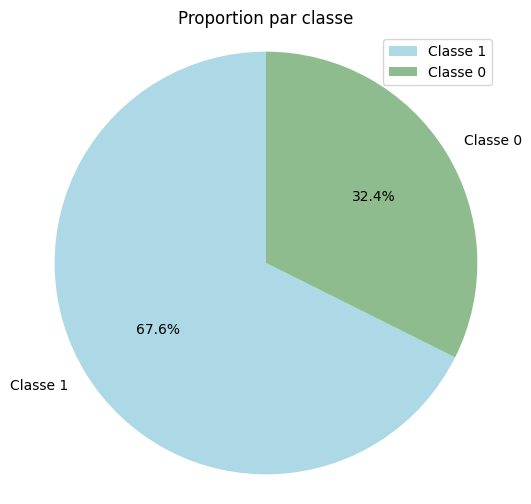

In [7]:
prop_1, prop_0 = proportion(YTrain)

# Création du camembert
labels = ['Classe 1', 'Classe 0']
sizes = [prop_1, prop_0]
colors = ['lightblue', 'darkseagreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion par classe")
plt.legend(labels, loc="upper right")
plt.axis('equal')  # Assure un aspect circulaire
plt.show()


## Boxplot sur la répartition des notes

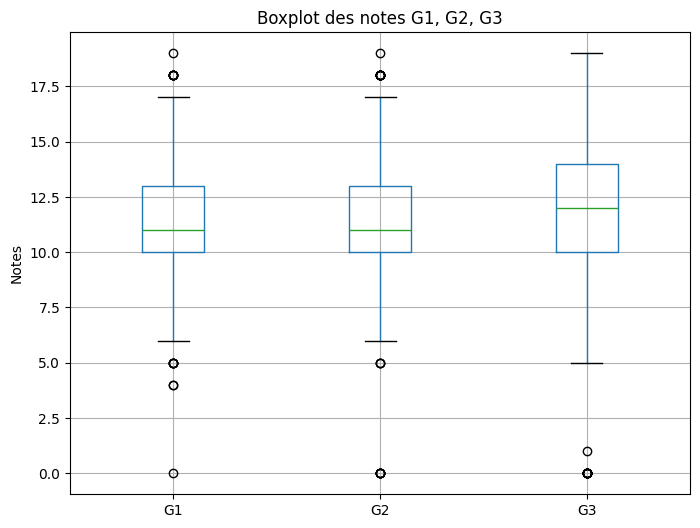

Statistiques principales :
               G1          G2          G3
count  649.000000  649.000000  649.000000
mean    11.399076   11.570108   11.906009
std      2.745265    2.913639    3.230656
min      0.000000    0.000000    0.000000
25%     10.000000   10.000000   10.000000
50%     11.000000   11.000000   12.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   19.000000

Médianes (2ème quartile) des notes :
G1    11.0
G2    11.0
G3    12.0
dtype: float64


In [8]:
def afficher_boxplot_et_statistiques(chemin):
    data = pd.read_csv(chemin, usecols=['G1', 'G2', 'G3'])

    plt.figure(figsize=(8, 6))
    boxplot = data.boxplot(column=['G1', 'G2', 'G3'])
    plt.title("Boxplot des notes G1, G2, G3")
    plt.ylabel("Notes")
    plt.show()

    # Calcul et affichage des statistiques principales
    stats = data.describe()
    print("Statistiques principales :")
    print(stats)

    # Calcul et affichage des médianes (2ème quartiles)
    medians = data.median()
    print("\nMédianes (2ème quartile) des notes :")
    print(medians)

afficher_boxplot_et_statistiques(chemin)


## Visualisation de la réussite des élèves selon les variables étudiées

In [9]:
def plot_data(chemin):
    XTrain = extractionX(chemin)
    YTrain = extractionY(chemin)

    df = pd.DataFrame(XTrain, columns=['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences'])
    df['YTrain'] = YTrain

    # Calcul du nombre de lignes et colonnes pour le subplot
    num_cols = len(df.columns) - 1
    num_rows = (num_cols - 1) // 4 + 1  # Calcul du nombre de lignes nécessaires

    fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

    for i, column in enumerate(df.columns[:-1]):
        row_idx = i // 4
        col_idx = i % 4

        # Calcul du pourcentage de "1" dans chaque catégorie
        percent_df = df.groupby(column)['YTrain'].mean() * 100  # La moyenne de `YTrain` * 100 donne le pourcentage de `1`

        # Convertir le résultat en DataFrame pour l'utiliser avec sns.barplot
        percent_df = percent_df.reset_index()
        percent_df.columns = [column, 'Percent_1']

        # Création du graphique en barres avec le pourcentage de "1"
        sns.barplot(x=column, y='Percent_1', data=percent_df, ax=axes[row_idx, col_idx], color ='#4C73A1')

        # Ajouter le pourcentage au-dessus de chaque barre
        for idx, p in enumerate(axes[row_idx, col_idx].patches):
            percentage = percent_df['Percent_1'].iloc[idx]
            axes[row_idx, col_idx].annotate(f'{percentage:.1f}%', 
                                            (p.get_x() + p.get_width() / 2, p.get_height()), 
                                            ha='center', va='bottom', 
                                            fontsize=9, color='black')

        axes[row_idx, col_idx].set_title(f'{column} vs % of YTrain=1')
        axes[row_idx, col_idx].set_xlabel(column)
        axes[row_idx, col_idx].set_ylabel('Percentage of YTrain = 1 (%)')

    plt.tight_layout()
    plt.show()


Index(['school', 'sex', 'age', 'address', 'Famsize', 'Pstatus', 'Fedu', 'Medu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'Famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'Famrel', 'Freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gmoy por'],
      dtype='object')
XTrain :
      sex  Pstatus  Medu  Fedu  traveltime  studytime  failures  higher  \
0      1        0     4     4           2          2         0       1   
1      1        1     1     1           1          2         0       1   
2      1        1     1     1           1          2         0       1   
3      1        1     2     4           1          3         0       1   
4      1        1     3     3           1          2         0       1   
..   ...      ...   ...   ...         ...        ...       ...     ...   
644    1        1     3     2           1          3         1       1   
6

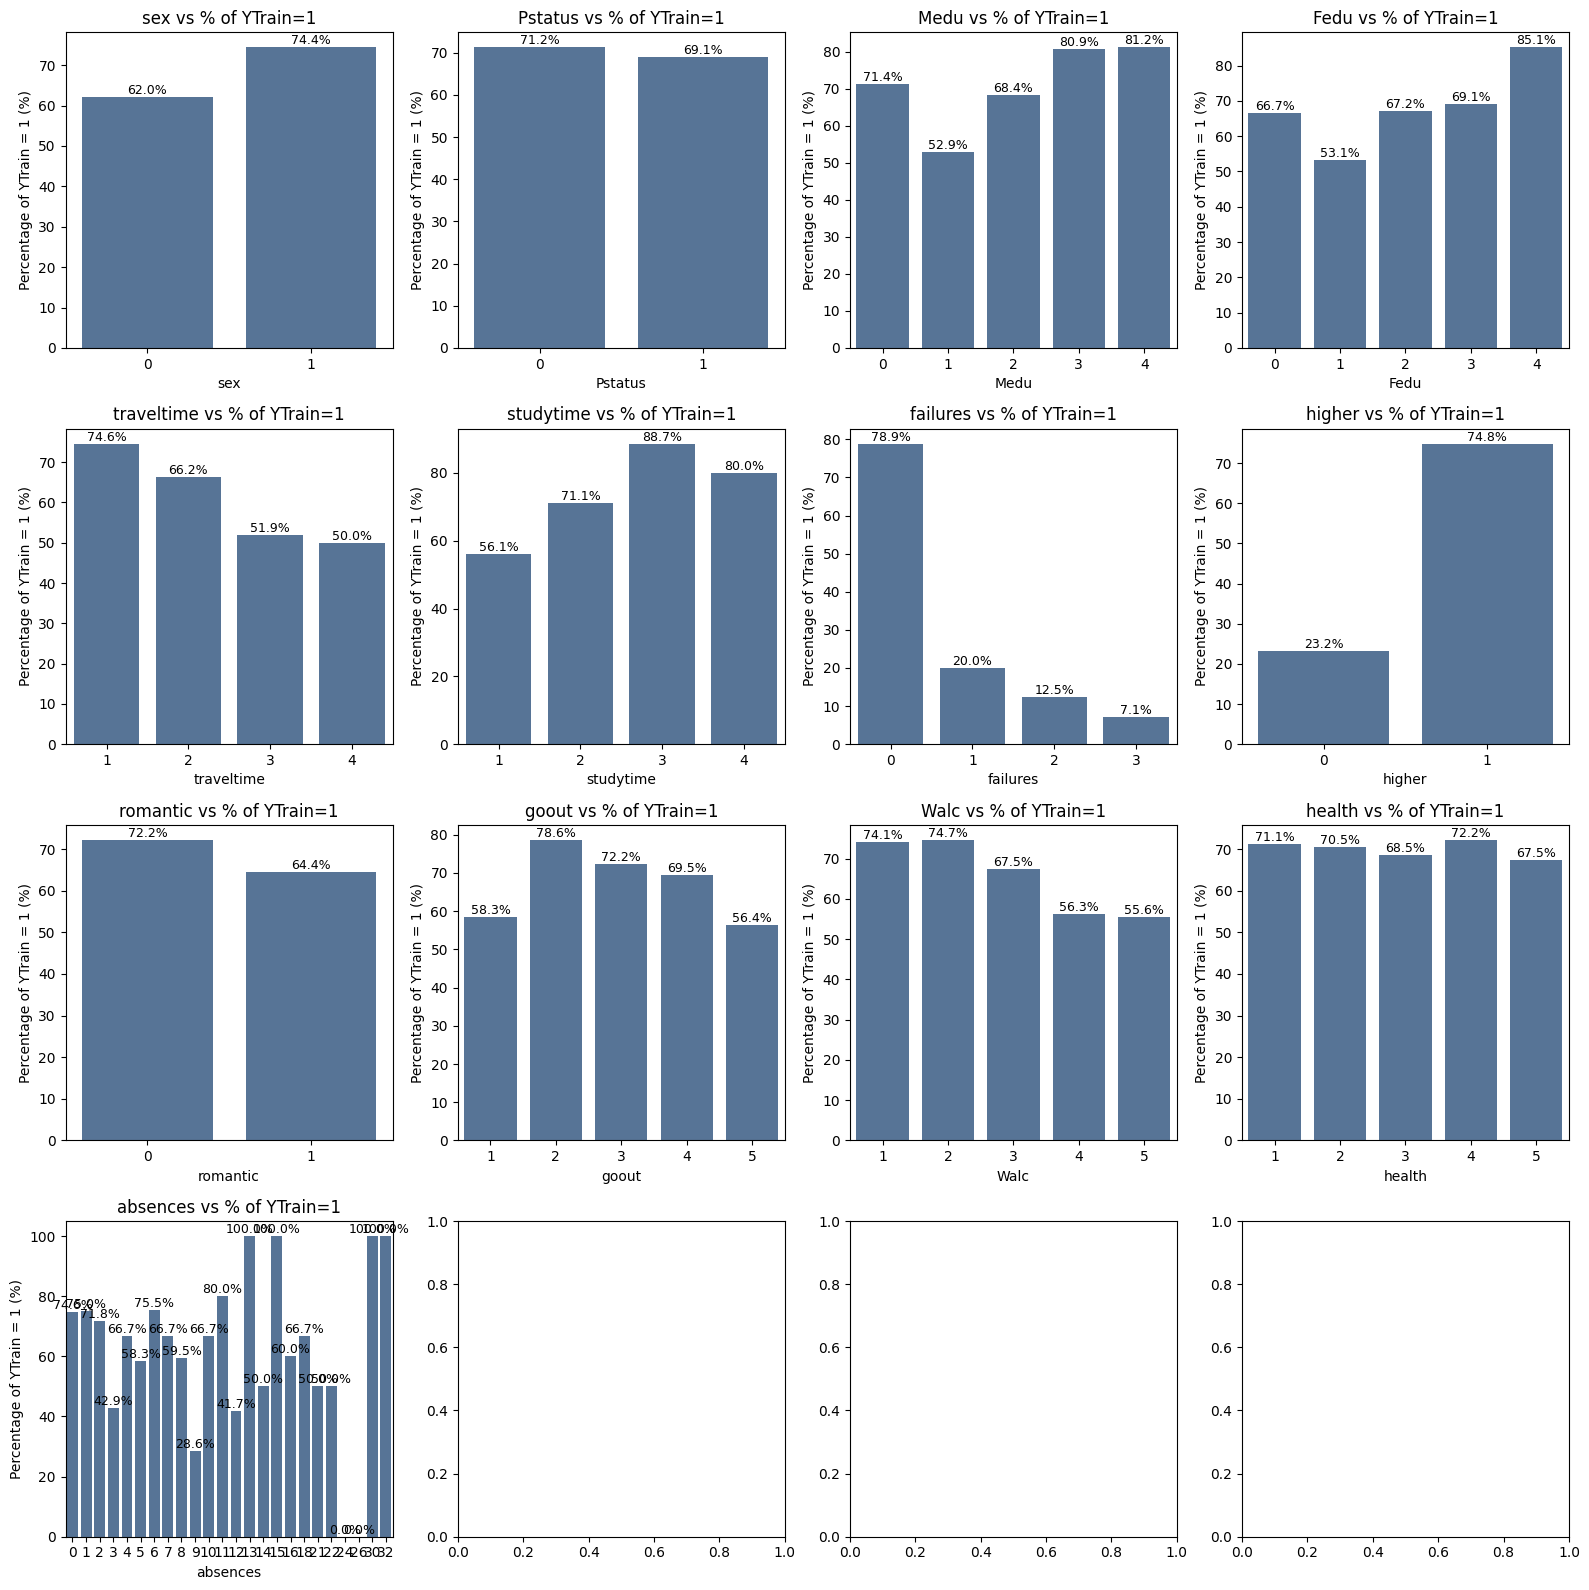

In [10]:
plot_data("data/port.csv")

# Classifieurs

## Affichage des frontières de décision
La fonction plot_decision_regions() permet de visualiser les frontières de décisions de certains indicateurs selon le classifieur. 

In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurer les marqueurs et la palette de couleurs
    markers = ('s', '^', 'o', 'v', '<')
    colors = ('orange', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Tracer la surface de décision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Tracer les points de données
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

## Classifieur Euclidien

Ces fonctions permettent de générer un classifieur Euclidien grâce au calcul des centroïdes et de la distance euclidienne.

In [12]:
# Calculer le centroïde d'une classe
def centroide(classe):
    taille = len(classe[0])  # Nombre de caractéristiques
    return [sum(v[i] for v in classe) / len(classe) for i in range(taille)]

# Distance euclidienne
def distanceEuclidienne(etudiant, centroide):
    return np.linalg.norm(np.array(etudiant) - np.array(centroide))

# Classifieur euclidien
def euclidien(XTrain, YTrain, XTest):
    # Assurer que YTrain est un tableau unidimensionnel
    YTrain = np.ravel(YTrain)

    classe1 = []  # Année validée
    classe0 = []  # Année non validée

    # Séparer les données en deux classes selon YTrain
    for i in range(len(XTrain)):
        if YTrain[i] == 1:
            classe1.append(np.array(XTrain[i]))
        else:
            classe0.append(np.array(XTrain[i]))

    # Calculer les centroïdes
    centroide1 = centroide(classe1)
    centroide0 = centroide(classe0)

    YTest = []
    for i in range(len(XTest)):
        dist1 = distanceEuclidienne(XTest[i], centroide1)  # Distance au centroïde de classe 1
        dist0 = distanceEuclidienne(XTest[i], centroide0)  # Distance au centroïde de classe 0
        if dist1 > dist0:
            YTest.append(1)  # Plus proche de classe 1
        else:
            YTest.append(0)  # Plus proche de classe 0
    return YTest


In [13]:
YPredict = euclidien(XTrain, YTrain, XTest)
print(YPredict)
print(len(YPredict))

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
130


Cette fonction utilise le classifieur Euclidien définit ci-dessus sur notre base de données. Elle retourne le taux d'erreur du classifieur.

In [14]:
def executEuclidien(XTest, XTrain, YTrain, YTest):
  YPredict = euclidien(XTest, XTrain, YTrain)
  nbErreurs_Test = 0
  for i in range(len(YTest)):
    if YPredict[i] != YTest[i]:
      nbErreurs_Test+=1
  tauxErreurs_Test = nbErreurs_Test / len(YTest)
  
  return tauxErreurs_Test, nbErreurs_Test


In [15]:
tauxErreurs_Test, nbErreurs_Test = executEuclidien(XTest, XTrain, YTrain, YTest)
print(f"Taux d'erreur du classifieur euclidien: {tauxErreurs_Test}")
print(f"Nombre d'erreur du classifieur euclidien: {nbErreurs_Test}\n")

Taux d'erreur du classifieur euclidien: 0.7615384615384615
Nombre d'erreur du classifieur euclidien: 99



## QNN

#### Définition du classifieur des plus proches voisins

In [16]:
def classesLesPlusProches(tableau_vecteurs, vecteur_cible, YTrain, k):
  distances = [distanceEuclidienne(vecteur_cible, v) for v in tableau_vecteurs]
  indices_plus_proches = np.argsort(distances)[:k]
  vecteurs_plus_proches = [tableau_vecteurs[i] for i in indices_plus_proches]
  classesPlusProches = [YTrain[i] for i in indices_plus_proches]
  return classesPlusProches

def qnn(XTrain, XTest, YTrain, YTest, k):
  Yhat = []
  for i in range(len(XTest)):
    classes = classesLesPlusProches(XTrain, XTest[i], YTrain, k)
    nombre_de_un = sum(1 for elem in classes if elem == 1)
    nombre_de_zero = sum(1 for elem in classes if elem == 0)
    if nombre_de_un > nombre_de_zero:
      classeX = 1
    else:
      classeX = 0
    Yhat.append(classeX)
  return Yhat

#### Exécution du classifieur QNN

In [17]:
def executQnn(XTrain, XTest, YTrain, YTest, k):
  Yhat = qnn(XTrain, XTest, YTrain, YTest, k)

  nbErreurs = 0
  for i in range(len(Yhat)):
    if Yhat[i] != YTest[i]:
      nbErreurs+=1
  tauxErreurs = nbErreurs / len(YTest)
  return tauxErreurs

#### Interprétation du nombre de voisins

In [18]:
def interpretationQnn(XTrain, XTest, YTrain, YTest, n):
    tauxErreurs = []

    for i in range(1, n+1):  # Boucle sur les valeurs de voisins de 1 à n (évite i=0 si ce n'est pas valide)
        tauxErreurs.append(executQnn(XTrain, XTest, YTrain, YTest, i))  # Appel d'une fonction pour calculer l'erreur

    tauxErreurs = np.array(tauxErreurs)  # Conversion en tableau numpy pour faciliter le traitement
    indices = np.arange(1, n+1)  # Création des indices correspondant aux nombres de voisins

    # Calcul de la tendance linéaire
    coeffs = np.polyfit(indices, tauxErreurs, deg=1) 
    tendance = np.poly1d(coeffs) 

    plt.figure(figsize=(7, 5))  
    plt.plot(indices, tauxErreurs, marker='o', linestyle='-', label="Taux d'erreurs")  
    plt.plot(indices, tendance(indices), color='0.25', linestyle='--', label="Tendance linéaire") 
    plt.xlabel('Nombre de voisins', fontsize=12)
    plt.ylabel("Taux d'erreurs", fontsize=12)
    plt.title("Taux d'erreurs en fonction du nombre de voisins", fontsize=14)

    plt.grid(True)
    plt.show()

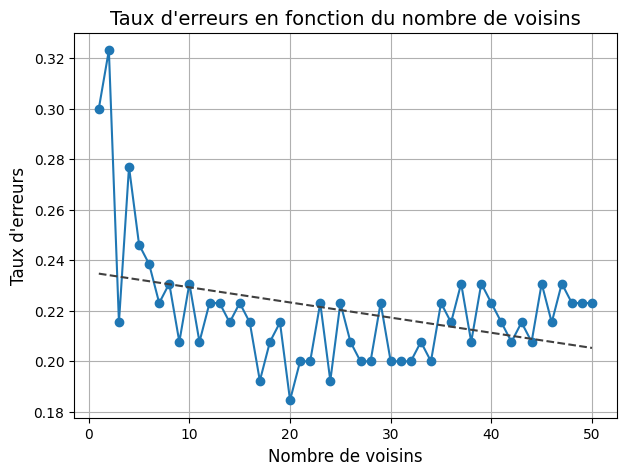

In [19]:
interpretationQnn(XTrain, XTest, YTrain, YTest, 50)

## Bayes Naïf

#### Définition du classfieur Bayes Naïf

In [20]:
def taux_erreur_bayes_naif(XTrain, YTrain, XTest, YTest):
    # Initialisation du classifieur Bayes Naïf
    CNB = GaussianNB()
    
    # Entraînement du modèle sur l'ensemble d'entraînement
    CNB.fit(XTrain, YTrain)
    
    # Prédictions sur l'ensemble de test
    YPredTest = CNB.predict(XTest)
    YPredTrain = CNB.predict(XTrain)
    
    # Calcul des taux d'erreur
    taux_erreur_train = 1 - accuracy_score(YTrain, YPredTrain)
    taux_erreur_test = 1 - accuracy_score(YTest, YPredTest)
    
    return taux_erreur_train, taux_erreur_test

In [21]:
taux_train, taux_test = taux_erreur_bayes_naif(XTrain, YTrain, XTest, YTest)
print(f"Taux d'erreur empirique CNB (train): {taux_train}")
print(f"Taux d'erreur empirique CNB (test): {taux_test}")

Taux d'erreur empirique CNB (train): 0.20423892100192675
Taux d'erreur empirique CNB (test): 0.16153846153846152


#### Visualisation CBN avec 2 variables :

Il est possible de visualiser les frontières de décisions par classifieur selon les indicateurs en leur attribuant un numéro et en le renseignant dans l'appel de la fonction plot_classifieur_decisions_regions().

La relation numéro - indicateur est la suivante :

0 - sex

1 - Pstatus

2 - Medu

3 - Fedu

4 - traveltime

5 - studytime

6 - failures

7 - higher

8 - romantic

9 - goout

10 - Walc

11 - health

12 - absences

In [22]:
def plot_CNB_decisions_regions(XTrain, YTrain, feat1, feat2):
  X_selected = XTrain[:, [feat1, feat2]]
  colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences']
  CNB = GaussianNB()
  CNB.fit(X_selected, YTrain)

  plt.figure(figsize=(7, 5))
  plot_decision_regions(X_selected, YTrain, CNB, resolution=0.01) 
  plt.legend(labels=['0', '1'], loc='upper left')
  plt.xlabel(f'{colonnes[feat1]} : F {feat1}')
  plt.ylabel(f'{colonnes[feat2]} : F {feat2}')
  plt.title(f'Frontières de décision - Naif Bayes sur {colonnes[feat1]} et {colonnes[feat2]}')
  plt.show()


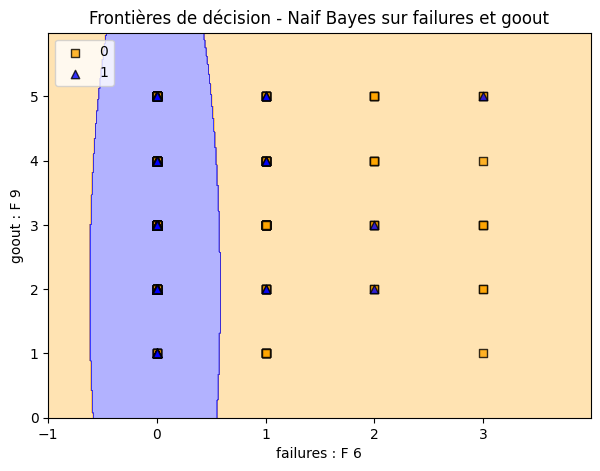

In [23]:
plot_CNB_decisions_regions(XTrain, YTrain, 6, 9)

En appelant plot_CNB_decisions_regions(XTrain, YTrain, 6, 9) pour afficher les frontières de décisions des variables "failures" et "goout", on remarque bien l'importance de la variable "failures" par rapport à la variable "goout". Lorsque l'on a aucun échec, on peut sortir beaucoup et réussir son année. En revanche, si on redouble une fois ou plus, même si on ne sort pas, on est plus à même d'échouer.

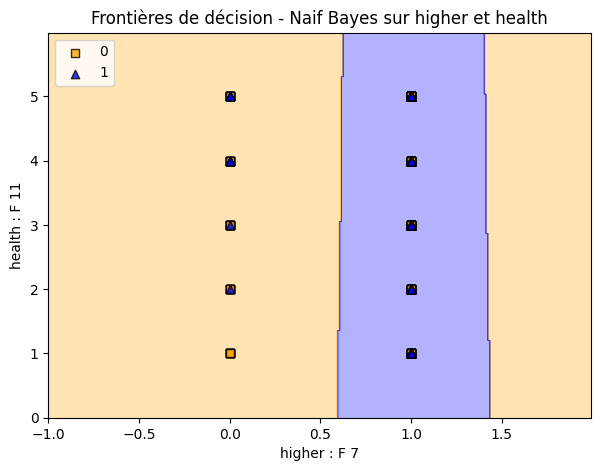

In [24]:
plot_CNB_decisions_regions(XTrain, YTrain, 7, 11)

Les frontières de décisions entre les variables "health" et "higher" nous montrent que la variable higher a beaucoup d'importance. Il semble donc que l'état de santé n'impacte pas beaucoup la réussite scolaire. Cela provient surement du fait qu'en moyenne, des personnes si jeunes sont moins touchés par des problèmes de santé handicapants. A l'inverse, un élève qui n'a pas d'ambition de poursuites d'études dans le futur aura tendance à avoir plus de difficulté.

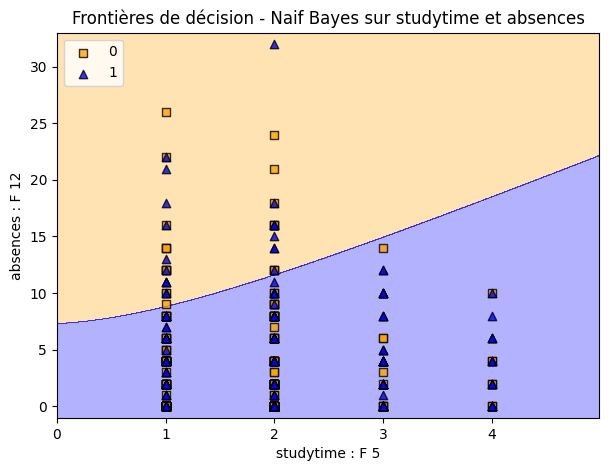

In [25]:
plot_CNB_decisions_regions(XTrain, YTrain, 5, 12)

Ici on observe les frontières de décisions des variables "studytime" et "absences". On constate que tant que l'étudiant ne dépasse pas 7 absences, il aura tendance à réussir son année même avec une faible quantité de travail. De plus, il semblerait que plus les absences augmentent, plus il faut du travail à l'élève pour espèrer réussir son année. Enfin, on voit que les élèves ayant une quantité de travail est de niveau 3 (entre 5 et 10h de travail par semaine) présentent au plus 14 absences dans l'année et ceux dont la quantité de travail est de niveau 4 (plus de 10h de travail par semaine) présentent au plus 10 absences. Ainsi, les étudiants travaillant beaucoup, sont moins susceptible d'absentéisme. Ces variables semblent liés.

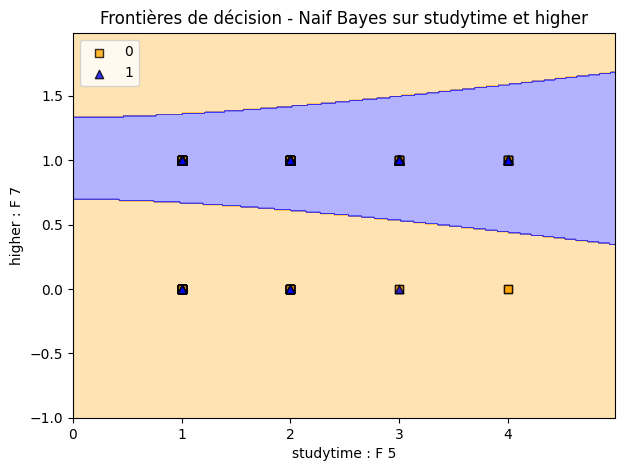

In [26]:
plot_CNB_decisions_regions(XTrain, YTrain, 5, 7)

Ce graphe semble indiquer que la volonté de faire des études supérieures ("higher") à plus de poids que le temps de travail ("studytime") sur la réussite scolaire.

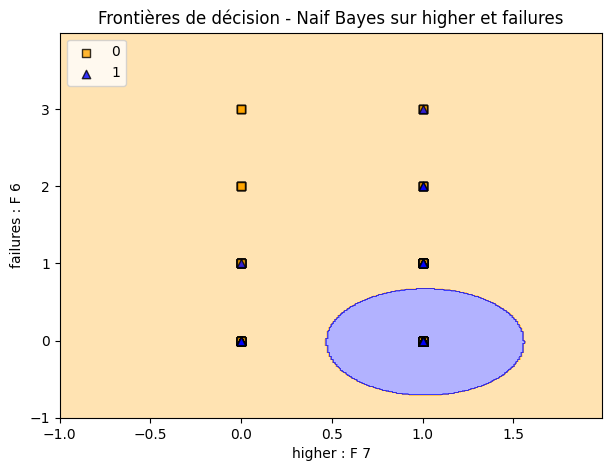

In [27]:
plot_CNB_decisions_regions(XTrain, YTrain, 7, 6)

Les étudiants qui réussissent leur année, ont tendance à avoir très peu ou aucune absence et une volonté de faire des études supérieures.

## LDA

In [28]:
def taux_erreur_lda(XTrain, YTrain, XTest, YTest):
  # Apprentissage LDA
  lda = LinearDiscriminantAnalysis()
  lda.fit(XTrain, YTrain)

  # Prédictions sur l'ensemble de test
  YPredTest = lda.predict(XTest)
  YPredTrain = lda.predict(XTrain)

  # Taux erreur empirique LDA
  taux_erreur_train = 1 - accuracy_score(YTrain, YPredTrain)
  taux_erreur_test = 1 - accuracy_score(YTest, YPredTest)

  return taux_erreur_train, taux_erreur_test

In [29]:
taux_train, taux_test = taux_erreur_lda(XTrain, YTrain, XTest, YTest)
print(f"Taux d'erreur empirique LDA (train): {taux_train}")
print(f"Taux d'erreur empirique LDA (test): {taux_test}")

Taux d'erreur empirique LDA (train): 0.21772639691714835
Taux d'erreur empirique LDA (test): 0.16923076923076918


#### Visualisation LDA avec 2 variables

In [30]:
def plot_lda_decision_regions_2feat(XTrain, YTrain, feat1, feat2):
  # On sélectionne deux variables pour la visualisation
  X_selected = XTrain[:, [feat1, feat2]]
  colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences']
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_selected, YTrain)
  plt.figure(figsize=(7, 5))
  plot_decision_regions(X_selected, YTrain, lda, 0.01)
  plt.legend(labels=['0', '1'], loc='upper left')
  plt.xlabel(f'{colonnes[feat1]} : F {feat1}')
  plt.ylabel(f'{colonnes[feat2]} : F {feat2}')
  plt.title(f'Frontières de décision - LDA sur {colonnes[feat1]} et {colonnes[feat2]}')
  plt.show()

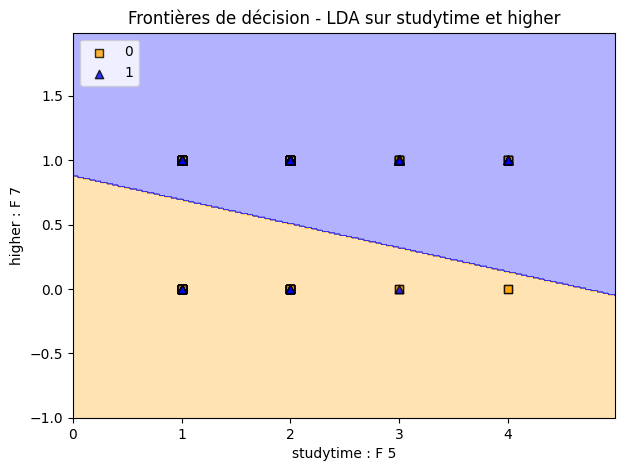

In [31]:
plot_lda_decision_regions_2feat(XTrain, YTrain, 5, 7)

Comme pour les autres classifieurs, on remarque que la volonté de poursuivre des études plus tard augmente les chances de valider son année. Cependant, il ne suffit pas de souhaiter poursuivre ses études pour valider son année mais plutôt que les élèves souhaitant poursuivre leurs études sont probablement plus sérieux, travailleurs et motivés que ceux n'ayant pas d'ambition scolaire. Le fait de travailler est bien un indicateur de réussite étant donné que plus l'élève étudie et plus il va avoir tendance à réussir.

## QDA

In [32]:
def taux_erreur_qda(XTrain, YTrain, XTest, YTest):
  # Apprentissage LDA
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(XTrain, YTrain)

  # Prédictions sur l'ensemble de test
  YPredTest = qda.predict(XTest)
  YPredTrain = qda.predict(XTrain)

  # Taux erreur empirique LDA
  taux_erreur_train = 1 - accuracy_score(YTrain, YPredTrain)
  taux_erreur_test = 1 - accuracy_score(YTest, YPredTest)

  return taux_erreur_train, taux_erreur_test

In [33]:
taux_train, taux_test = taux_erreur_qda(XTrain, YTrain, XTest, YTest)
print(f"Taux d'erreur empirique QDA (train): {taux_train}")
print(f"Taux d'erreur empirique QDA (test): {taux_test}")

Taux d'erreur empirique QDA (train): 0.19653179190751446
Taux d'erreur empirique QDA (test): 0.17692307692307696


#### Visualisation QDA avec 2 variables

In [34]:
def plot_qda_decision_regions_2feat(XTrain, YTrain, feat1, feat2):
  # On sélectionne deux variables pour la visualisation
  X_selected = XTrain[:, [feat1, feat2]]
  colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences']
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_selected, YTrain)
  plt.figure(figsize=(7, 5))
  plot_decision_regions(X_selected, YTrain, qda, 0.01)
  plt.legend(labels=['0', '1'], loc='upper left')
  plt.xlabel(f'{colonnes[feat1]} : F {feat1}')
  plt.ylabel(f'{colonnes[feat2]} : F {feat2}')
  plt.title(f'Frontières de décision - QDA sur {colonnes[feat1]} et {colonnes[feat2]}')
  plt.show()

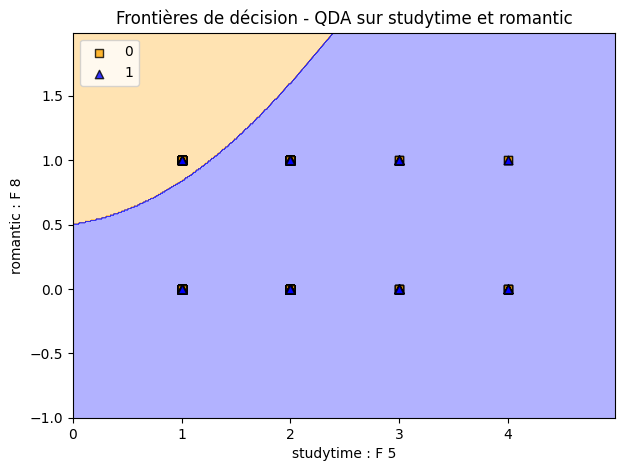

In [35]:
plot_qda_decision_regions_2feat(XTrain, YTrain, 5, 8)

En observant l'importance du travail en fonction de la situation romantique dans la réussite, on voit que les élèves réussissent proportionnelement à leur temps de travail : s'ils travaillent beaucoup, ils vont avoir tendances à réussir.

De plus, on voit que pour une même quantité de travail fournie, l'élève en couple aura moins de chance de réussite que l'élève célibataire. 

La frontière de décision nous montre finalement qu'à partir d'une certaine quantité de travail, si l'on prend deux élèves fournissant la même quantité de travail, une personne célibataire aura plus de chance de réussite qu'une personne en couple.

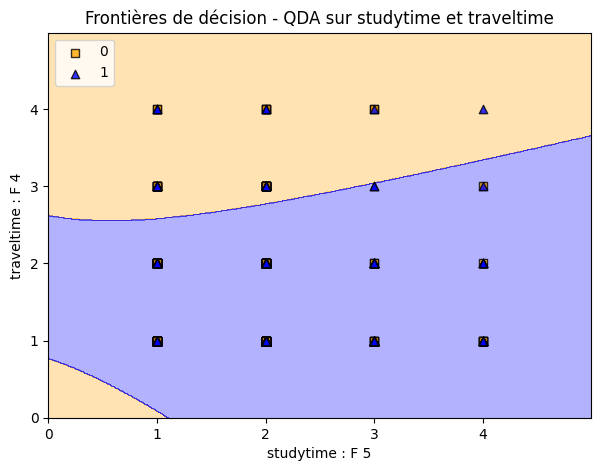

In [36]:
plot_qda_decision_regions_2feat(XTrain, YTrain, 5, 4)

Sur ce graphe, on observe qu'un long temps de trajet pour aller à l'école (entre 30 minutes et une heure ou supérieur à une heure) impacte la réussite. Le temps de travail, même très important, ne permet pas de pallier à un très long temps de trajet. Nous pensons que ce résultat illustre le fait que ces étudiants n'ont pas la possibilité de travailler longtemps, puisqu'il n'y a pas d'étudiants ayant à la fois un temps de travail et un temps de trajet de niveau maximal. En effet, les étudiants ayant un très long temps de travaille n'ont, dès lors, pas le temps d'avoir un temps de travail important et donc ont des difficultés scolaires. 

## Régression logistique

Pour cette section, nous avons décidé d'étudier les deux bases de données disponibles (résultats en mathématiques et en portugais) afin de comparer l'impacte des critères dans les deux cas. 

In [37]:
# ajout d'une colonne contenant la classe associée à chaque élève
def add_outcome_column(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    if "Gmoy por" not in df.columns:
        raise ValueError("La colonne 'Gmoy por' est absente du fichier CSV.")
    
    # nettoyage et formatage des moyennes
    df["Gmoy por"] = df["Gmoy por"].str.replace('"', '').str.replace(',', '.').astype(float)
    
    # ajout de la colonne Outcome
    df["Outcome"] = (df["Gmoy por"] > 10).astype(int)
    
    # sauvegarder le fichier
    df.to_csv(output_csv, index=False)

add_outcome_column("data/maths.csv", "data/maths_avec_classe.csv")
add_outcome_column("data/port.csv", "data/port_avec_classe.csv")

### Lecture des bases de données

In [38]:
def read_data_LR(file) :
    df = pd.read_csv(file)
    colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences', 'Outcome']
    df = df[colonnes]
    # print('df =', df)

    df = df.reset_index()
    df.drop(['index'], axis='columns', inplace=True)

    YRdf = pd.DataFrame(df['Outcome'])
    YR = np.array(YRdf).ravel()
    # print('np.unique(YR) =', np.unique(YR))

    Xdf = df.copy()
    Xdf.drop(['Outcome'], axis='columns', inplace=True)
    X = np.array(Xdf)
    return X, YR

X_maths, YR_maths = read_data_LR("data/maths_avec_classe.csv") # pour la base maths
X_port, YR_port = read_data_LR("data/port_avec_classe.csv") # pour la base port

### Définition des bases test et apprentissage
La section suivante divise aléatoirement la base de données en une base d'apprentissage (variable donnée par dataset_size) et une base de test. Pour la base maths.csv, on conserve 300 profils pour la base d'apprentissage et 95 pour la base de test. Pour la base port.csv, 550 et 99.

In [39]:
def split_data_LR(X, YR, dataset_size):
    np.random.seed(407)
    XTrain, XTest, YRTrain, YRTest = train_test_split(X, YR, train_size=dataset_size, random_state=407)
    d = XTrain.shape[1]
    nTrain = XTrain.shape[0]
    nTest = XTest.shape[0]
    return XTrain, XTest, YRTrain, YRTest, nTrain, nTest, d

XTrain_maths, XTest_maths, YRTrain_maths, YRTest_maths, nTrain_maths, nTest_maths, d = split_data_LR(X_maths, YR_maths, 300)
XTrain_port, XTest_port, YRTrain_port, YRTest_port, nTrain_port, nTest_port, d = split_data_LR(X_port, YR_port, 550)

#### Calibrage de la régression linéaire et accuracy

In [40]:
def regLog(XTrain, YRTrain, XTest, YRTest, nTrain, nTest):
    # Fit Logistic Regression :
    LR_model = LogisticRegression(max_iter = 10000)
    LR_model.fit(XTrain, YRTrain)

    # Accuracy Train LR :
    YhatTrain = LR_model.predict(XTrain)
    Acc_LR_TRain = np.sum(YRTrain==YhatTrain)/nTrain
    LR_taux_erreur_train = 1 - Acc_LR_TRain
    print('Accuracy Train LR =', Acc_LR_TRain)

    #Accuracy Test LR : 
    YhatTest = LR_model.predict(XTest)
    Acc_LR_Test = np.sum(YRTest==YhatTest)/nTest
    LR_taux_erreur_test = 1 - Acc_LR_Test
    print('Accuracy Test LR =', Acc_LR_Test)
    return LR_taux_erreur_train, LR_taux_erreur_test, Acc_LR_TRain, Acc_LR_Test, LR_model


print("Base mathématiques")
RL_maths = regLog(XTrain_maths, YRTrain_maths, XTest_maths, YRTest_maths, nTrain_maths, nTest_maths)

print("Base portugais")
RL_port = regLog(XTrain_port, YRTrain_port, XTest_port, YRTest_port, nTrain_port, nTest_port)


Base mathématiques
Accuracy Train LR = 0.6866666666666666
Accuracy Test LR = 0.5894736842105263
Base portugais
Accuracy Train LR = 0.8090909090909091
Accuracy Test LR = 0.7575757575757576


### Interprétation du modèle de Régresssion Logisitique

In [41]:
def beta_LR(LR_model, d):
    beta = np.zeros(d+1)
    beta[0] = LR_model.intercept_
    beta[1:] = LR_model.coef_
    print('')
    print('beta =', beta)
    print('')
    return beta

beta_LR(RL_maths[4], d)
beta_LR(RL_port[4], d)


beta = [ 1.4753694  -0.58270484 -0.22469901  0.03871158  0.25972649 -0.21102075
  0.07325532 -1.10681069 -0.03489926 -0.08002754 -0.33251967  0.03441547
  0.0275045  -0.02555439]


beta = [-0.72073632  0.20656899 -0.29381557  0.26532361  0.04341365 -0.11955335
  0.38215695 -1.67280396  1.60630402 -0.35891685 -0.13661124 -0.06791653
  0.05774099 -0.0112771 ]



/var/folders/x0/18nx0r8560g7z09_clg6bx380000gn/T/ipykernel_39821/772363571.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[0] = LR_model.intercept_


array([-0.72073632,  0.20656899, -0.29381557,  0.26532361,  0.04341365,
       -0.11955335,  0.38215695, -1.67280396,  1.60630402, -0.35891685,
       -0.13661124, -0.06791653,  0.05774099, -0.0112771 ])

### Régularisation LASSO

In [42]:
np.random.seed(407)

step = 0.005
stock_lambda = np.arange(0.0001, 1, step)
nb_lambda = stock_lambda.shape[0]
stock_beta_maths = np.zeros((nb_lambda,d))
stock_beta_port = np.zeros((nb_lambda,d))
stock_average_risk_Train_maths = np.zeros(nb_lambda)
stock_average_risk_Train_port = np.zeros(nb_lambda)

l = 0

for lmbda in stock_lambda:
    
    LR_model_maths = LogisticRegression(penalty='l1', solver='saga', C=lmbda, max_iter = 10000)
    LR_model_port = LogisticRegression(penalty='l1', solver='saga', C=lmbda, max_iter = 10000)
    LR_model_maths.fit(XTrain_maths, YRTrain_maths)
    LR_model_port.fit(XTrain_port, YRTrain_port)
    Yhat_maths = LR_model_maths.predict(XTrain_maths)
    Yhat_port = LR_model_port.predict(XTrain_port)
    stock_average_risk_Train_maths[l] = np.sum(YRTrain_maths==Yhat_maths)/nTrain_maths
    stock_average_risk_Train_port[l] = np.sum(YRTrain_port==Yhat_port)/nTrain_port
    stock_beta_maths[l] = LR_model_maths.coef_
    stock_beta_port[l] = LR_model_port.coef_
        
    l = l+1


### Visuation des beta versus $\lambda$ et des accuracy versus $\lambda$ pour la **base Mathématique**

/var/folders/x0/18nx0r8560g7z09_clg6bx380000gn/T/ipykernel_39821/2269377536.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(fontsize=20, loc='lower right')


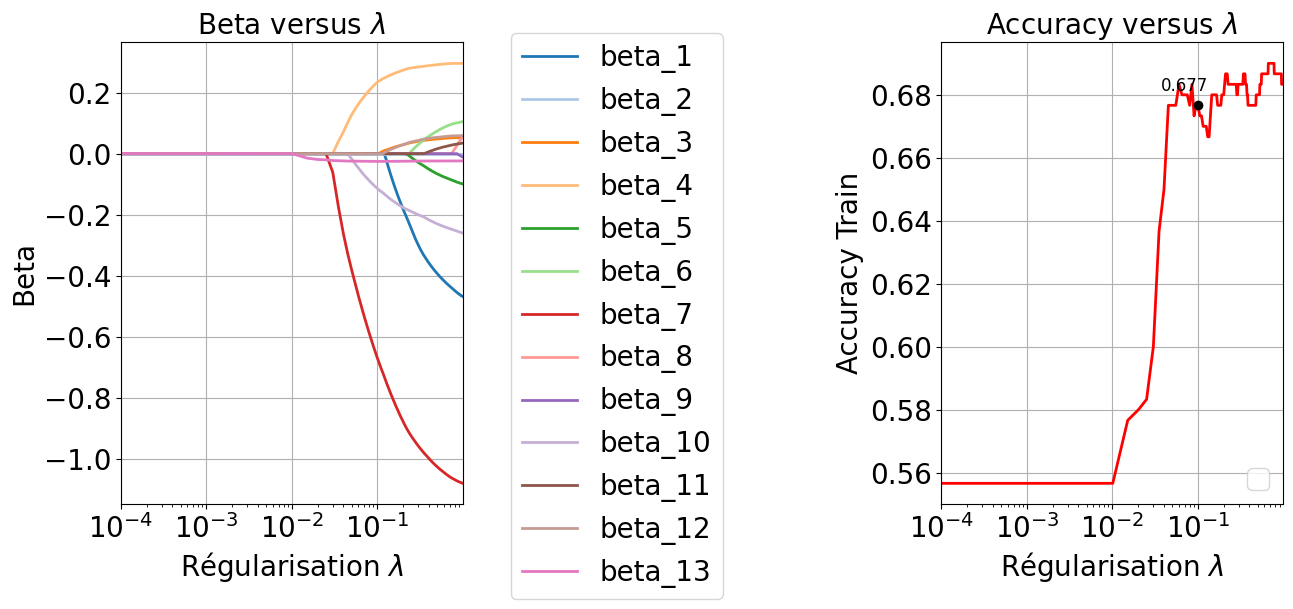

In [43]:
fig_select_lambda = plt.figure(figsize=(15,6))
colors = plt.cm.tab20(np.arange(d))
lambda_target = 10**-1

# Chercher l'indice correspondant à lambda_target
idx_target = np.argmin(np.abs(stock_lambda - lambda_target))

# Valeurs correspondantes pour annotation lambda_target
beta_values = stock_beta_maths[idx_target, :]
accuracy_value = stock_average_risk_Train_maths[idx_target]

ax1 = fig_select_lambda.add_subplot(1,3,1)
for j in range(d):
    labelstring = "beta_"+str(j+1)
    ax1.plot(stock_lambda, stock_beta_maths[:,j], lw=2, label=labelstring, color=colors[j])
ax1.legend(fontsize=20, bbox_to_anchor=(1.1, 1.05))
ax1.set_xlabel("Régularisation $\lambda$",fontsize=20)
ax1.set_ylabel("Beta",fontsize=20)
ax1.set_title("Beta versus $\lambda$",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim([np.min(stock_lambda),np.max(stock_lambda)])
ax1.grid()
ax1.set_xscale('log')



ax2 = fig_select_lambda.add_subplot(1,3,3)
ax2.plot(stock_lambda, stock_average_risk_Train_maths, lw=2, color='red')
ax2.legend(fontsize=20, loc='lower right')
ax2.set_xlabel("Régularisation $\lambda$",fontsize=20)
ax2.set_ylabel("Accuracy Train",fontsize=20)
ax2.set_title("Accuracy versus $\lambda$",fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim([np.min(stock_lambda),np.max(stock_lambda)])

# Ajout du point et de l'annotation sur le deuxième graphe
ax2.scatter(lambda_target, accuracy_value, color='black', zorder=5)  # Ajout du point lambda_target
ax2.annotate(f"{accuracy_value:.3f}", 
             (lambda_target, accuracy_value),
             textcoords="offset points", xytext=(-10, 10), ha='center', fontsize=12)
ax2.grid()
ax2.set_xscale('log')



### Visuation des beta versus $\lambda$ et des accuracy versus $\lambda$ pour la **base Portugais**

/var/folders/x0/18nx0r8560g7z09_clg6bx380000gn/T/ipykernel_39821/3423875686.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(fontsize=20, loc='lower right')


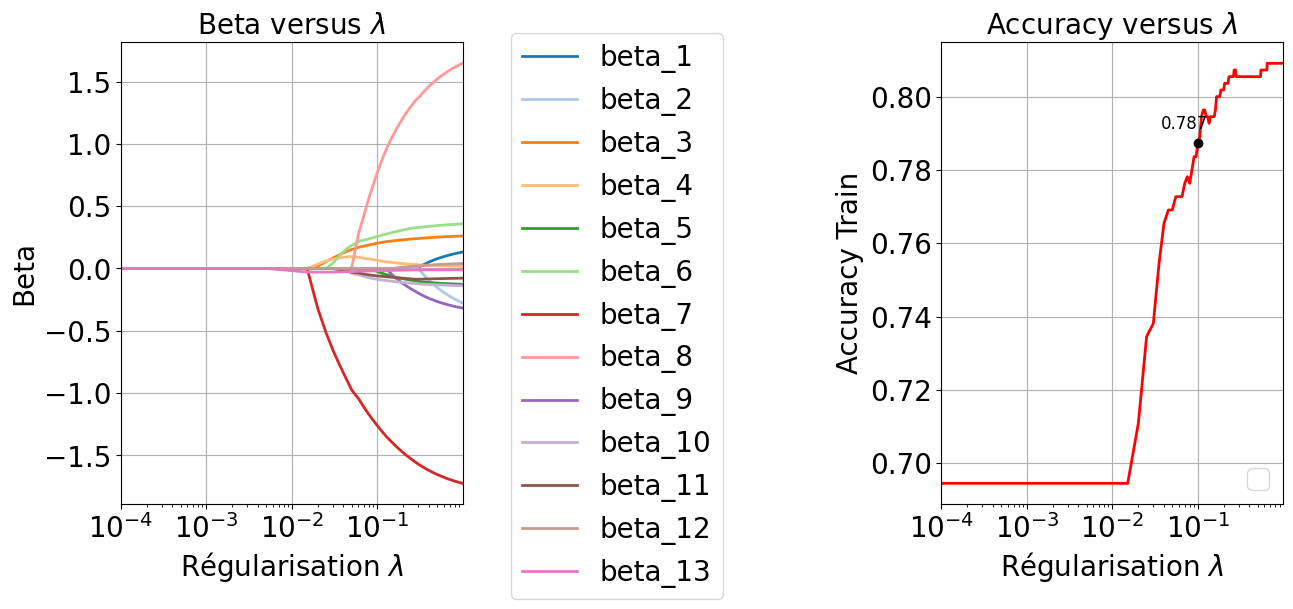

In [44]:
fig_select_lambda = plt.figure(figsize=(15,6))
lambda_target = 10**-1

# Chercher l'indice correspondant à lambda_target
idx_target = np.argmin(np.abs(stock_lambda - lambda_target))

# Valeurs correspondantes pour annotation lambda_target
beta_values = stock_beta_port[idx_target, :]
accuracy_value = stock_average_risk_Train_port[idx_target]

ax1 = fig_select_lambda.add_subplot(1,3,1)
for j in range(d):
    labelstring = "beta_"+str(j+1)
    ax1.plot(stock_lambda, stock_beta_port[:,j], lw=2, label=labelstring, color=colors[j])
ax1.legend(fontsize=20, bbox_to_anchor=(1.1, 1.05))
ax1.set_xlabel("Régularisation $\lambda$",fontsize=20)
ax1.set_ylabel("Beta",fontsize=20)
ax1.set_title("Beta versus $\lambda$",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim([np.min(stock_lambda),np.max(stock_lambda)])
ax1.grid()
ax1.set_xscale('log')



ax2 = fig_select_lambda.add_subplot(1,3,3)
ax2.plot(stock_lambda, stock_average_risk_Train_port, lw=2, color='red')
ax2.legend(fontsize=20, loc='lower right')
ax2.set_xlabel("Régularisation $\lambda$",fontsize=20)
ax2.set_ylabel("Accuracy Train",fontsize=20)
ax2.set_title("Accuracy versus $\lambda$",fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim([np.min(stock_lambda),np.max(stock_lambda)])
# Ajout du point et de l'annotation sur le deuxième graphe
ax2.scatter(lambda_target, accuracy_value, color='black', zorder=5)  # Ajout du point lambda_target
ax2.annotate(f"{accuracy_value:.3f}", 
             (lambda_target, accuracy_value),
             textcoords="offset points", xytext=(-10, 10), ha='center', fontsize=12)
ax2.grid()
ax2.set_xscale('log')


### Interprétations des résultats

**Base de données Mathématiques**\
On remarque que pour $\lambda$ = 10<sup>-1</sup> beta_4 (Fedu : éducation du père), beta_7 (failures : nombre de classes échouées) et beta_10 (goout : sorties) sont non nulles. De plus, l'accuracy correspondant à $\lambda$ = 10<sup>-1</sup> vaut 0,677 ce qui est satisfaisant.

**Base de données Portugais**\
On remarque que pour $\lambda$ = 10<sup>-1</sup> beta_3 (Medu : éducation de la mère), beta_6 (studytime),  beta_7 (failures : nombre de classes échouées) et beta_8 (higher : volonté de poursuivre dans l'éducation supérieure) sont non nulles. De plus, l'accuracy correspondant à $\lambda$ = 10<sup>-1</sup> vaut 0,787 ce qui est satisfaisant.

Le seul facteur influent commun aux deux bases de données est "failures". Ainsi, un élève ayant déjà échoué dans certaines classes aura plus de risque d'échouer à nouveau quel que soit la matière. De plus, dans les deux cas, l'éducation d'un parent influence la réussite. Enfin, les sorties (facteur "goout") et le temps passé à étudier (facteur "studytime") sont impctant en mathématiques et en portugais respectivement.

### Visualisation de la Régression Logistique avec 2 variables

In [45]:
def plot_logistic_regression_decision_regions_2feat(XTrain, YTrain, feat1, feat2):
  # On sélectionne deux variables pour la visualisation
  X_selected = XTrain[:, [feat1, feat2]]
  colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences']
  logistic_reg = LogisticRegression()
  logistic_reg.fit(X_selected, YTrain)
  plt.figure(figsize=(7, 5))
  plot_decision_regions(X_selected, YTrain, logistic_reg, 0.01)
  plt.legend(labels=['0', '1'], loc='upper left')
  plt.xlabel(f'{colonnes[feat1]} : F {feat1}')
  plt.ylabel(f'{colonnes[feat2]} : F {feat2}')
  plt.title(f'Frontières de décision - Régression logistique sur {colonnes[feat1]} et {colonnes[feat2]}')
  plt.show()

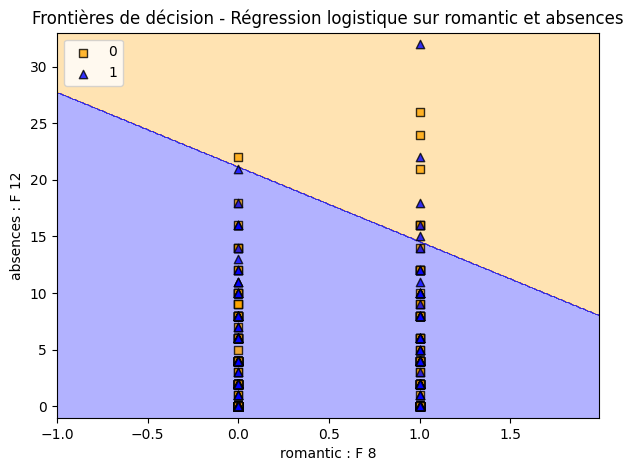

In [46]:
plot_logistic_regression_decision_regions_2feat(XTrain, YTrain, 8, 12)

Sur cette visualisation, on voit que plus un élève à d'absences, plus il va avoir tendance à échouer. On voit que cette tendance est d'autant plus importante si l'élève est en couple. De manière générale, on peut voir qu'au dela de 3 absence, l'élève aura plus tendance à échouer qu'à réussir 

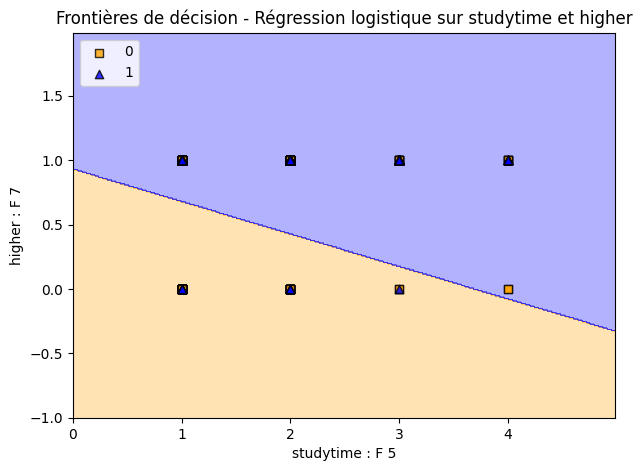

In [47]:
plot_logistic_regression_decision_regions_2feat(XTrain, YTrain, 5, 7)

Comme pour les autres classifieurs, on remarque que le fait de souhaiter poursuivre des études plus tard augmente les chances de valider son année. Attention, il ne suffit pas de souhaite poursuivre ses études pour valider son année mais disons plutôt que les élèves souhaitant poursuivre leur étude sont probablement plus serieux, travailleurs et motivés que ceux n'ayant pas d'ambition scolaire. Le fait de travailler est bien un indicateur de réussite étant donné que plus l'élève étudie et plus il va avoir tendance à réussir.

## Decision Tree

### Définition des variables

In [48]:
XTrain, XTest, YTrain, YTest = train_test_split(extractionX(chemin), extractionY(chemin), test_size=0.2, random_state=42)
df = pd.read_csv(chemin, sep=",")

Index(['school', 'sex', 'age', 'address', 'Famsize', 'Pstatus', 'Fedu', 'Medu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'Famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'Famrel', 'Freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gmoy por'],
      dtype='object')
XTrain :
      sex  Pstatus  Medu  Fedu  traveltime  studytime  failures  higher  \
0      1        0     4     4           2          2         0       1   
1      1        1     1     1           1          2         0       1   
2      1        1     1     1           1          2         0       1   
3      1        1     2     4           1          3         0       1   
4      1        1     3     3           1          2         0       1   
..   ...      ...   ...   ...         ...        ...       ...     ...   
644    1        1     3     2           1          3         1       1   
6

In [49]:
np.random.seed(407)
d = XTrain.shape[1]
nTrain = XTrain.shape[0]
print('nTrain =', nTrain)
nTest = XTest.shape[0]
print('nTest =', nTest)

nTrain = 519
nTest = 130


### Arbre de décision élagué

Taux d'erreur de l'arbre de décision avec élagage : 0.19%


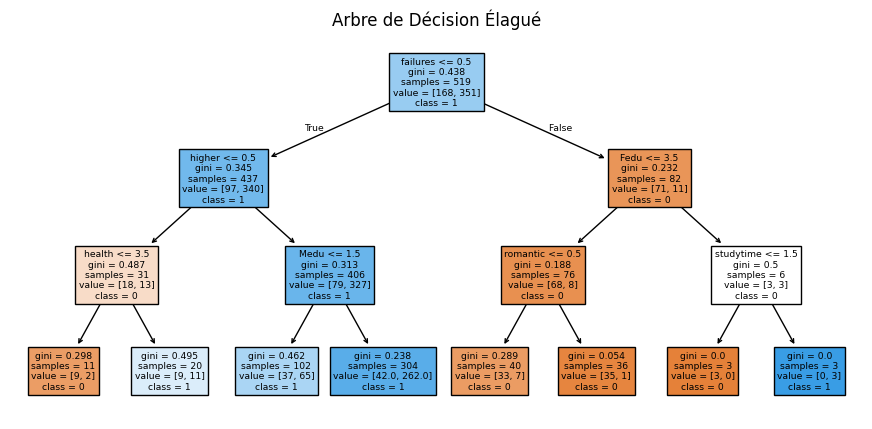

In [52]:
def arbre_decision(XTrain, YTrain, XTest, YTest, max_depth=2, min_samples_leaf=1, min_samples_split=2):
  arbre_decision = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  arbre_decision.fit(XTrain, YTrain)

  score = arbre_decision.score(XTrain, YTrain)
  taux_erreur = 1 - score
  print(f"Taux d'erreur de l'arbre de décision avec élagage : {taux_erreur:.2f}%")

  return arbre_decision, taux_erreur


def graphe_arbre_decision(arbre_decision, XTrain, YTrain):
  plt.figure(figsize=(11, 5))
  colonnes = ['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'higher', 'romantic', 'goout', 'Walc', 'health', 'absences']
  plot_tree(arbre_decision, filled=True, feature_names=colonnes, class_names=['0', '1'])
  plt.title("Arbre de Décision Élagué")
  plt.show()


arbre_decision = arbre_decision(XTrain, YTrain, XTest, YTest, max_depth=3, min_samples_leaf=1, min_samples_split=2)
graphe_arbre_decision(arbre_decision[0], XTrain, YTrain)

## Perceptron

In [ ]:
def perceptron_classifier(XTrain, YTrain, XTest, YTest):
  perceptron = Perceptron()
  perceptron.fit(XTrain, YTrain)
  
  accuracy = perceptron.score(XTest, YTest)
  taux_erreur = 1 - accuracy
  return taux_erreur


In [ ]:
taux_erreur = perceptron_classifier(XTrain, YTrain, XTest, YTest)
print(f"Taux d'erreur du modèle Perceptron : {taux_erreur}")

Taux d'erreur du modèle Perceptron : 0.25384615384615383


# Comparaison des résultats classifieurs

In [ ]:
def comparaison_classifieurs(XTrain, XTest, YTrain, YTest, RL):
    # Liste pour stocker les erreurs des classifieurs
    erreurs = []
    noms_classifieurs = []

    # Euclidien
    Euc_tauxErreurs_Test, nbErreurs_Test = executEuclidien(XTest, XTrain, YTrain, YTest)
    erreurs.append(Euc_tauxErreurs_Test)
    noms_classifieurs.append("Euclidien")

    # QNN
    tauxErreurs = []
    for i in range(10):
        tauxErreurs.append(executQnn(XTrain, XTest, YTrain, YTest, i))
    QNN_tauxErreurs = np.array(tauxErreurs)
    erreurs.append(min(QNN_tauxErreurs))
    noms_classifieurs.append("QNN")

    # Bayes Naif CNB
    CNB_taux_train, CNB_taux_test = taux_erreur_bayes_naif(XTrain, YTrain, XTest, YTest)
    erreurs.append(CNB_taux_test)
    noms_classifieurs.append("Bayes Naif")

    # LDA
    LDA_taux_train, LDA_taux_test = taux_erreur_lda(XTrain, YTrain, XTest, YTest)
    erreurs.append(LDA_taux_test)
    noms_classifieurs.append("LDA")

    # QDA
    QDA_taux_train, QDA_taux_test = taux_erreur_qda(XTrain, YTrain, XTest, YTest)
    erreurs.append(QDA_taux_test)
    noms_classifieurs.append("QDA")

    # Regression logistique
    # LR_tauxErreur_Train, LR_tauxErreur_Test, Acc_LR_Train, Acc_LR_Test = regLog(XTrain, YTrain, XTest, YTest, nTrain, nTest)
    erreurs.append(RL[1])
    noms_classifieurs.append("Reg. Log.")

    # Perceptron
    erreur_perceptron = perceptron_classifier(XTrain, YTrain, XTest, YTest)
    erreurs.append(erreur_perceptron)
    noms_classifieurs.append("Perceptron")

    # Arbre de décision
    erreurs.append(arbre_decision[1])
    noms_classifieurs.append("Arbre de decision")


    # Afficher les erreurs des classifieurs une par une
    print("Taux d'erreur par classifieur :")
    for nom, erreur in zip(noms_classifieurs, erreurs):
        print(f"{nom}: {erreur:.2f}")

    # Créer un histogramme des erreurs
    plt.bar(noms_classifieurs, erreurs)
    plt.xlabel('Classifieurs')
    plt.ylabel('Taux d\'erreur')
    plt.title('Taux d\'erreur des classifieurs')

    # Ajouter les étiquettes des valeurs sur chaque barre
    for i, erreur in enumerate(erreurs):
        plt.text(i, erreur, f'{erreur:.2f}', ha='center', va='bottom')

    # Changer l'échelle de l'axe des ordonnées
    plt.ylim(0, 1.0)

    # Ajuster l'espacement entre les barres sur l'axe des abscisses
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

    plt.show()

    # Trouver le classifieur avec le plus petit taux d'erreur
    meilleur_classifieur_index = np.argmin(erreurs)
    meilleur_classifieur = noms_classifieurs[meilleur_classifieur_index]

    # Afficher la clé du meilleur classifieur
    print(f"Le meilleur classifieur est '{meilleur_classifieur}' avec un taux d'erreur de {erreurs[meilleur_classifieur_index]:.2f}.")

Taux d'erreur par classifieur :
Euclidien: 0.76
QNN: 0.21
Bayes Naif: 0.16
LDA: 0.17
QDA: 0.18
Reg. Log.: 0.24
Perceptron: 0.25
Arbre de decision: 0.19


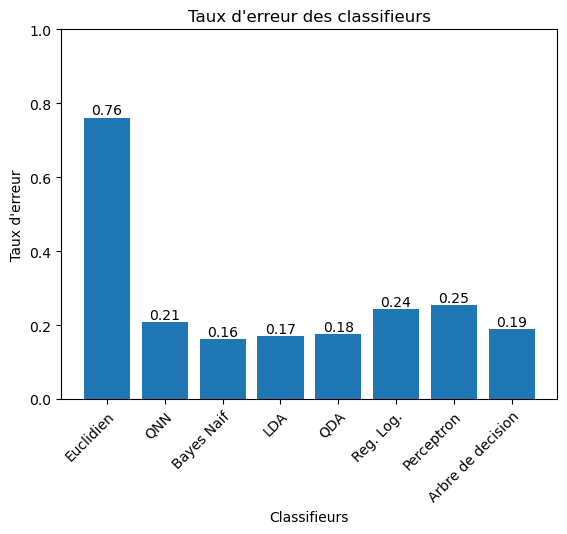

Le meilleur classifieur est 'Bayes Naif' avec un taux d'erreur de 0.16.


In [ ]:
comparaison_classifieurs(XTrain, XTest, YTrain, YTest, RL_port)

# Conclusion
Ce projet nous a permis de développer et appliquer les classifieurs présentés en cours de ML01 sur une base de données ayant éveillé notre curiosité : les résultats scolaires des étudiants au regard de critères socio-démographiques. Avant l’étude, nous avions émis l’hypothèse que le temps de travail, les sorties et le contexte (distance de l’école, famille, etc.) de l’étudiant étaient déterminants. 

Au vu de nos résultats, les facteurs les plus influents semblent être le nombre de classes échouées, le temps passé à étudier, la volonté de faire des études supérieures et l’éducation des parents. Nous remarquons tout de même que les résultats donnés par les classifieurs peuvent varier et sont plus ou moins nuancés. En effet, le classifieur Bayes Naïf présente des résultats plus catégoriques que les autres. Par exemple, il semblerait que la volonté de faire des études supérieures suffit à avoir de bons résultats scolaires or cela est beaucoup plus nuancé du côté de la Régression Linéaire qui montre l’importance du temps passé à étudier. 

Finalement, il nous semble important de préciser que la réussite scolaire n’est pas neutre. En effet, le contexte socio-démographique et économique ayant un impact majeur sur la capacité d’un étudiant à s’investir pour sa réussite scolaire, on ne peut se contenter d’affirmer qu’il suffit de volonté et de travail. Il serait intéressant d’effectuer ce type d’analyse sur une population en étude supérieure afin de constater les facteurs influents à notre niveau. 
